## 🧠 Projeto de Modelagem de Risco de Crédito
### 🎯 1. Objetivo do Projeto

>Desenvolver um modelo preditivo de risco de crédito para classificar clientes como adimplentes (0) ou inadimplentes (1) com base em seus dados demográficos e financeiros, a fim de auxiliar decisões automatizadas de concessão de crédito.

## Análise Exploratória dos dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df.shape

(32581, 12)

In [5]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
#Verifica valores ausentes
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Análise Exploratória - Resumo Estatístico

In [10]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

A variável `loan_status` é desbalanceada e não há quase relação de correlação com as demais.

✔️ Como interpretar:

Situação comum em crédito real (muito mais bons pagadores do que maus)

Modelos supervisionados tendem a prever só a classe majoritária sem técnica de balanceamento

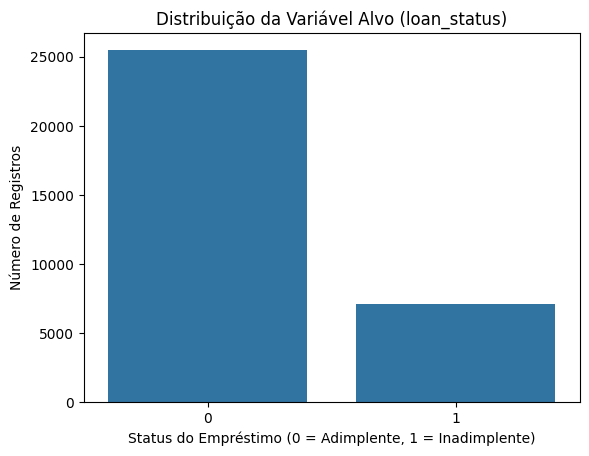

In [11]:
sns.countplot(data=df, x='loan_status')
plt.title('Distribuição da Variável Alvo (loan_status)')
plt.xlabel('Status do Empréstimo (0 = Adimplente, 1 = Inadimplente)')
plt.ylabel('Número de Registros')
plt.show()

In [12]:
df.drop(columns=['loan_status']).describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [13]:
df.drop(columns=['loan_status']).describe().T[['mean','50%']]


,mean,50%
person_age,27.734600,26.00
person_income,66074.848470,55000.00
person_emp_length,4.789686,4.00
loan_amnt,9589.371106,8000.00
loan_int_rate,11.011695,10.99
loan_percent_income,0.170203,0.15
cb_person_cred_hist_length,5.804211,4.00


🧠 O que você pode concluir:

Variáveis como ``person_income``, ``loan_amnt`` e ``cb_person_cred_hist_length`` são assimétricas à direita (viés positivo): isso significa que a maioria dos valores está concentrada em faixas menores, mas há valores muito altos que puxam a média para cima.

Essas variáveis podem:

- Influenciar mal modelos lineares

- Se beneficiar de transformações logarítmicas, por exemplo:

    - ``df['log_income'] = np.log1p(df['person_income'])``

In [14]:
df.corr(numeric_only=True)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


In [15]:
df.corr(numeric_only=True)['loan_status'].sort_values(ascending=False)

loan_status                   1.000000
loan_percent_income           0.379366
loan_int_rate                 0.335133
loan_amnt                     0.105376
cb_person_cred_hist_length   -0.015529
person_age                   -0.021629
person_emp_length            -0.082489
person_income                -0.144449
Name: loan_status, dtype: float64

✔️ Como interpretar:

Pode indicar:

As variáveis individuais não têm poder preditivo isolado

O modelo precisa capturar interações não lineares (ex: árvores de decisão, XGBoost)

Pode haver padrões latentes em combinações de variáveis (ex: ``loan_percent_income + loan_intent``)

In [17]:
for col in df.select_dtypes(include='object').columns:
    display(df[col].value_counts(normalize=True))
    display(pd.crosstab(df[col], df['loan_status'], normalize='index'))


person_home_ownership
RENT        0.504773
MORTGAGE    0.412633
OWN         0.079310
OTHER       0.003284
Name: proportion, dtype: float64

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.874293,0.125707
OTHER,0.691589,0.308411
OWN,0.925310,0.074690
RENT,0.684300,0.315700


loan_intent
EDUCATION            0.198060
MEDICAL              0.186336
VENTURE              0.175532
PERSONAL             0.169455
DEBTCONSOLIDATION    0.159971
HOMEIMPROVEMENT      0.110647
Name: proportion, dtype: float64

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.714121,0.285879
EDUCATION,0.827832,0.172168
HOMEIMPROVEMENT,0.738974,0.261026
MEDICAL,0.732993,0.267007
PERSONAL,0.801123,0.198877
VENTURE,0.851897,0.148103


loan_grade
A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: proportion, dtype: float64

loan_status,0,1
loan_grade,,
A,0.900436,0.099564
B,0.837240,0.162760
C,0.792660,0.207340
D,0.409542,0.590458
E,0.355809,0.644191
F,0.294606,0.705394
G,0.015625,0.984375


cb_person_default_on_file
N    0.82367
Y    0.17633
Name: proportion, dtype: float64

loan_status,0,1
cb_person_default_on_file,,
N,0.816068,0.183932
Y,0.621932,0.378068
